In [7]:
import keras
from keras.applications.inception_v3 import InceptionV3, conv2d_bn
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import h5py
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline

In [2]:
def features_from_file(path, ctx):
    h5f = h5py.File(path, 'r')
    batch_count = h5f['batches'].value
    print(ctx, 'batches:', batch_count)       
    
    def generator():
        while True:
            for batch_id in range(0, batch_count):
                X = h5f['features-' + str(batch_id)]
                y = h5f['labels-' + str(batch_id)]
                yield X, y
            
    return batch_count, generator()

train_steps_per_epoch, train_generator = features_from_file('./data/train-ALL.h5', 'train')
validation_steps, validation_data = features_from_file('./data/validation-ALL.h5', 'validation')

train batches: 835
validation batches: 10


In [3]:
np.random.seed(7)
inputs = Input(shape=(8, 8, 2048))
x = conv2d_bn(inputs, 64, 1, 1)
x = Dropout(0.5)(x)
x = Flatten()(x)
outputs  = Dense(4, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.adam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8, 8, 2048)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          131072    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          192       
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 16388     
Total para

In [5]:
# Setup a callback to save the best model
callbacks = [ 
    ModelCheckpoint('./output/model.features.{epoch:02d}-{val_acc:.2f}.hdf5', 
                 monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=1),
             
    ReduceLROnPlateau(monitor='val_loss', verbose=1, factor=0.5, patience=5, min_lr=0.00005)
            ]

history = model.fit_generator(
            generator=train_generator, steps_per_epoch=train_steps_per_epoch,  
            validation_data=validation_data, validation_steps=validation_steps,
            epochs=100, callbacks=callbacks)

Epoch 1/100
835/835 [==============================] - 80s 96ms/step - loss: 0.4353 - acc: 0.8475 - val_loss: 0.1904 - val_acc: 0.9250

Epoch 00001: val_acc improved from -inf to 0.92500, saving model to ./output/model.features.01-0.93.hdf5
Epoch 2/100
835/835 [==============================] - 81s 97ms/step - loss: 0.3008 - acc: 0.8933 - val_loss: 0.0945 - val_acc: 0.9710

Epoch 00002: val_acc improved from 0.92500 to 0.97100, saving model to ./output/model.features.02-0.97.hdf5
Epoch 3/100
835/835 [==============================] - 81s 97ms/step - loss: 0.2620 - acc: 0.9069 - val_loss: 0.0941 - val_acc: 0.9750

Epoch 00003: val_acc improved from 0.97100 to 0.97500, saving model to ./output/model.features.03-0.98.hdf5
Epoch 4/100
835/835 [==============================] - 79s 95ms/step - loss: 0.2369 - acc: 0.9167 - val_loss: 0.1834 - val_acc: 0.9480

Epoch 00004: val_acc did not improve
Epoch 5/100
835/835 [==============================] - 79s 95ms/step - loss: 0.2127 - acc: 0.9246 


Epoch 00042: val_acc did not improve
Epoch 43/100
835/835 [==============================] - 83s 99ms/step - loss: 0.0253 - acc: 0.9915 - val_loss: 0.0577 - val_acc: 0.9860

Epoch 00043: val_acc did not improve
Epoch 44/100
835/835 [==============================] - 90s 107ms/step - loss: 0.0263 - acc: 0.9912 - val_loss: 0.0648 - val_acc: 0.9850

Epoch 00044: val_acc did not improve
Epoch 45/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0251 - acc: 0.9915 - val_loss: 0.0616 - val_acc: 0.9850

Epoch 00045: val_acc did not improve
Epoch 46/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0257 - acc: 0.9913 - val_loss: 0.0620 - val_acc: 0.9870

Epoch 00046: val_acc did not improve
Epoch 47/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0249 - acc: 0.9916 - val_loss: 0.0659 - val_acc: 0.9850

Epoch 00047: val_acc did not improve
Epoch 48/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0243 - 


Epoch 00089: val_acc did not improve
Epoch 90/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0544 - val_acc: 0.9880

Epoch 00090: val_acc did not improve
Epoch 91/100
835/835 [==============================] - 91s 108ms/step - loss: 0.0201 - acc: 0.9931 - val_loss: 0.0589 - val_acc: 0.9860

Epoch 00091: val_acc did not improve
Epoch 92/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0624 - val_acc: 0.9850

Epoch 00092: val_acc did not improve
Epoch 93/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0598 - val_acc: 0.9850

Epoch 00093: val_acc did not improve
Epoch 94/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0626 - val_acc: 0.9840

Epoch 00094: val_acc did not improve
Epoch 95/100
835/835 [==============================] - 90s 108ms/step - loss: 0.0202 -

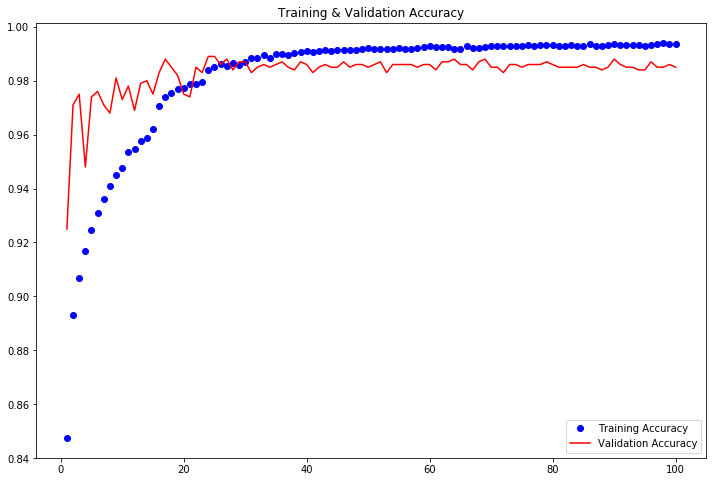

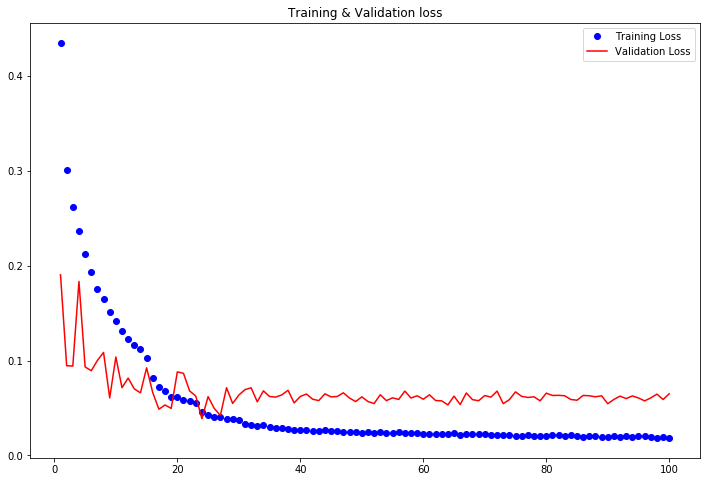

In [10]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12,8))
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', color='red', label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    plt.figure(figsize=(12,8))
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', color='red', label='Validation Loss')
    plt.title('Training & Validation loss')
    plt.legend()

    plt.show()
    return acc, val_acc, loss, val_loss


acc, val_acc, loss, val_loss = plot_history(history)